Consider the 2-dimensional discrete map defined by
$ \qquad\qquad\quad x_{n+1} =1+ βx_n − αy^2_n ,\\
\qquad\qquad\quad y_{n+1} = x_n$
where $α$ and $β$ are constants. Suppose that $α = 1,$                                                 
plot iterative plots and power spectra for system when $ β = [ 0.05,0.12, 0.3 ]$

In [1]:
import numpy as np
from scipy.fftpack import fft
import matplotlib.pyplot as plt
plt.rcParams['text.usetex'] = True
plt.rcParams["figure.figsize"] = (18,8)

In [3]:
def Iterative_map(a,b,n = 50000):

    def map_2d(X):
        x, y = X
        xn = 1 - a*y**2 + b*x
        yn = x
        return (xn, yn)

    X0 = [(1 - b) / 2, (1 - b) / 2]
    X, Y = [], []
    for i in range(n):
        xn, yn = map_2d(X0)
        X, Y = X + [xn], Y + [yn]
        X0 = [xn, yn]

    fig, (ax1, ax2) = plt.subplots(1,2)
    ax1.scatter(X, Y, color='blue', s=0.5)
    ax1.set_title('map plot ', fontsize=20)
    ax1.set_xlabel('x', fontsize=15)
    ax1.set_ylabel('y', fontsize=15)
    ax1.tick_params(labelsize=15)
    f = np.linspace(-1, 1, n)
    power = np.abs(fft(X)**2)
    power = np.log(power)
    ax2.plot(f, power)
    ax2.set_xlim(0, 1)
    ax2.set_title('power spectra ', fontsize=20)
    ax2.set_xlabel('Frequency (Hz)', fontsize=15)
    ax2.set_ylabel('log(Power)', fontsize=15)
    ax2.tick_params(labelsize=15)
    plt.suptitle(r'$\alpha$={},$\beta$={}'.format(a,b), fontsize=25)
    plt.show()   

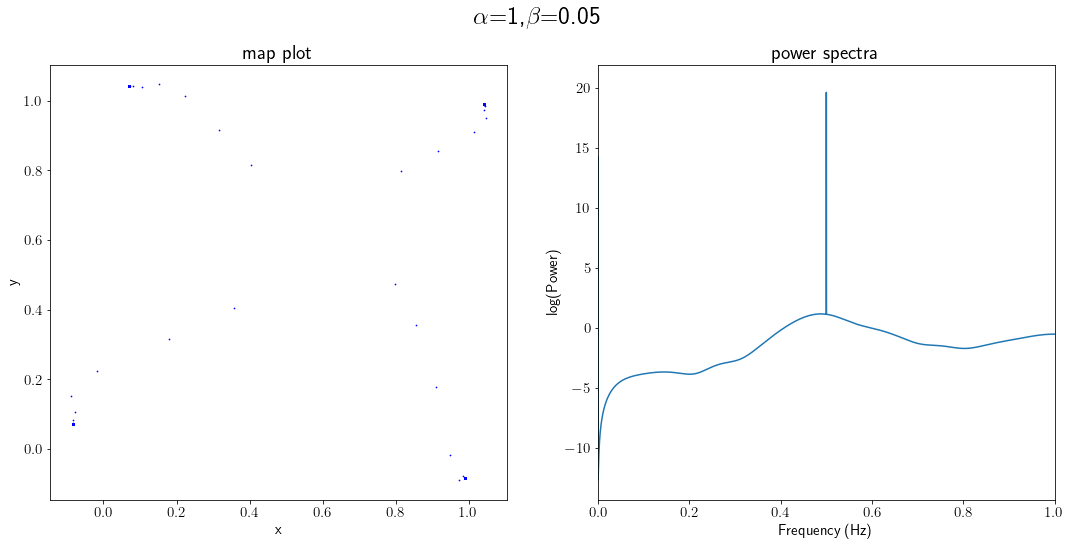

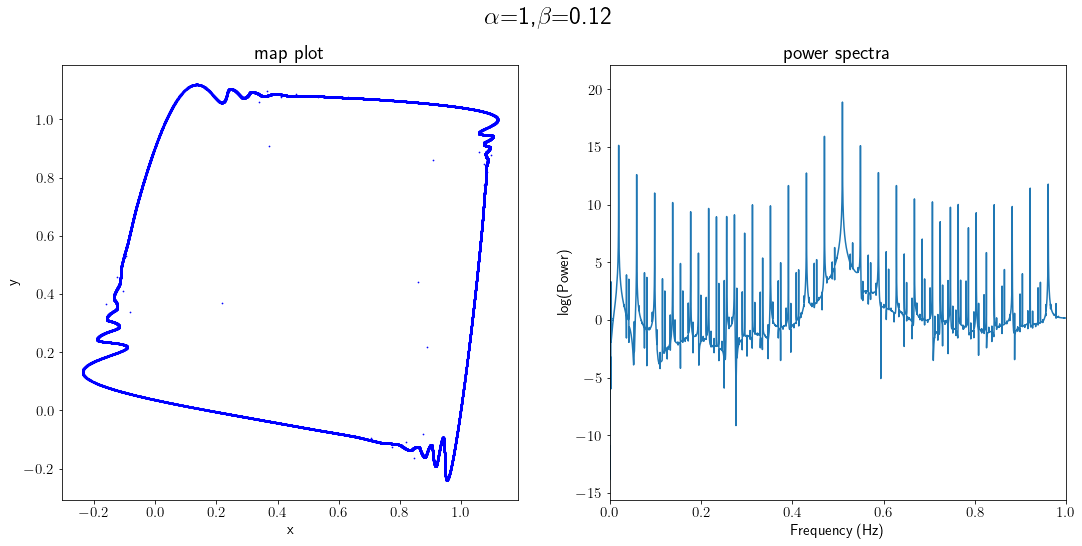

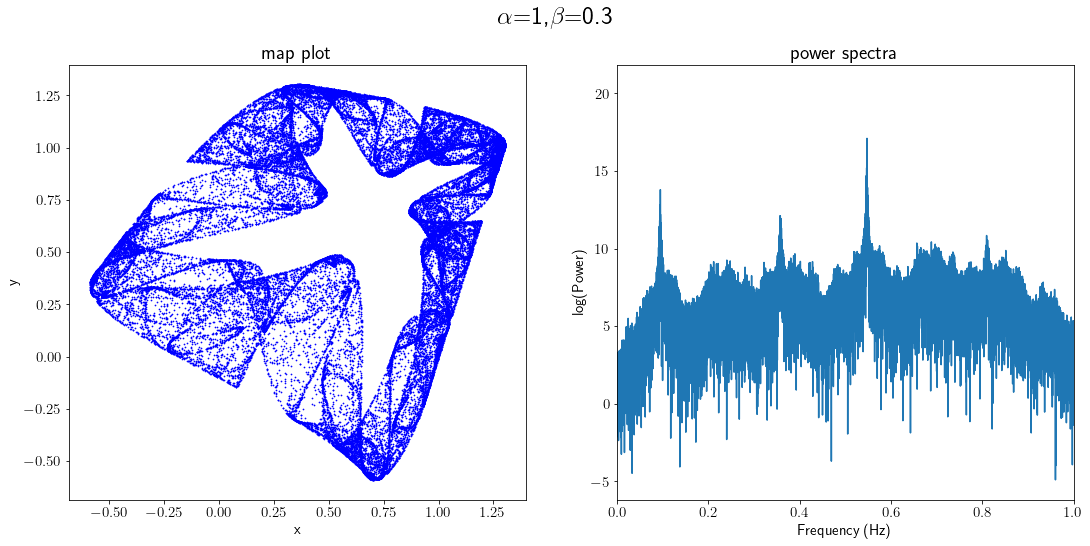

In [4]:
a=1
b=[0.05,0.12,0.3]
for b in b:
    Iterative_map(a,b)

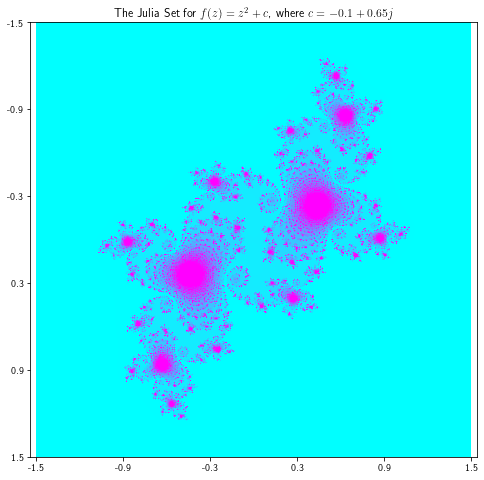

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numba as nb
# From https://scipython.com/book/chapter-7-matplotlib/problems/p72/the-julia-set/
# Image width and height; parameters for the plot
im_width, im_height = 500, 500
c = complex(-0.1, 0.65) #-0.8,.156 also beautiful
zabs_max = 10
nit_max = 1000
xmin, xmax = -1.5, 1.5
xwidth = xmax - xmin
ymin, ymax = -1.5, 1.5
yheight = ymax - ymin

@nb.jit(nopython=True)
def JuliaSet(im_width=im_width,im_height=im_height,
                    nit_max=nit_max,zabs_max=zabs_max):
    julia = np.zeros((im_width, im_height))
    for ix in range(im_width):
        for iy in range(im_height):
            nit = 0
            # Map pixel position to a point in the complex plane
            z = complex(ix / im_width * xwidth + xmin,
                        iy / im_height * yheight + ymin)
            # Do the iterations
            while abs(z) <= zabs_max and nit < nit_max:
                z = z**2 + c
                nit += 1
            shade = 1-np.sqrt(nit / nit_max)
            ratio = nit / nit_max
            julia[ix,iy] = ratio
    return julia
julia = JuliaSet()
fig, ax = plt.subplots(figsize=(8,8))
ax.imshow(julia, interpolation='nearest', cmap=cm.cool)
ax.axis('equal')
#ax.set_axis_off()
# Set the tick labels to the coordinates of z0 in the complex plane
xtick_labels = np.linspace(xmin, xmax, int(xwidth // 0.5))
ax.set_xticks([(x-xmin) / xwidth * im_width for x in xtick_labels])
ax.set_xticklabels(['{:.1f}'.format(xtick) for xtick in xtick_labels])
ytick_labels = np.linspace(ymin, ymax, int(yheight // 0.5))
ax.set_yticks([(y-ymin) / yheight * im_height for y in ytick_labels])
ax.set_yticklabels(['{:.1f}'.format(ytick) for ytick in ytick_labels])
ax.set_title(r"The Julia Set for $f(z)=z^2+c$, where $c = −0.1+0.65j$")
plt.show()

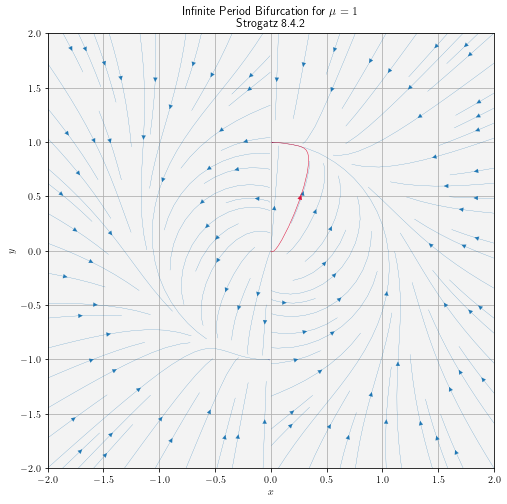

In [6]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, writers
from scipy import *
from scipy import integrate
from scipy.integrate import ode, odeint
import numpy as np

plt.close()
fig,ax = plt.subplots(1,1,figsize=(8,8))

#Vector field
xmin,xmax = -2,2
ymin,ymax = -2,2
gridpoints = 1000
mu = 1# -1/4
omega = .15
x1,y1 = np.linspace(xmin,xmax,gridpoints),np.linspace(ymin,ymax,gridpoints)
X,Y = np.meshgrid(x1,y1 )
#x = rcos(theta), x' = r'cos(theta) - r(sin(theta))theta'
#y = rsin(theta), y' = r'sin(theta) + r(cos(theta))theta'
#X = r, Y = theta
# # 
#For the system:
# U = r*(1 - r**2)
# V = mu - np.sin(theta)
#The converted coordinates are: 
X_prime = -mu*Y - X**3 - X*Y**2 + X + Y**2/(X*np.sqrt(1 + Y**2/X**2))
Y_prime = mu*X - X**2*Y - Y**3 + Y - Y/np.sqrt(1 + Y**2/X**2)
U = X_prime
V =  Y_prime
# Starting values
start = [[.1,.1]]

#Plotting. 
strm = ax.streamplot( X,Y,U, V,
                                    linewidth=.2)
strmS = ax.streamplot(x1,y1, U, V,
                                    start_points=start,
                                    color="crimson",
                                    linewidth=.5)
ax.set_facecolor(plt.cm.gray(.95))
ax.set_title('Infinite Period Bifurcation for $\mu = {}$ \n Strogatz 8.4.2'.format(mu))
ax.set_xlim([xmin,xmax])
ax.set_ylim([ymin,ymax])
ax.set_xlabel(r"$x$")
ax.set_ylabel(r"$y$")
ax.grid(True)
#ax.legend()
plt.show()

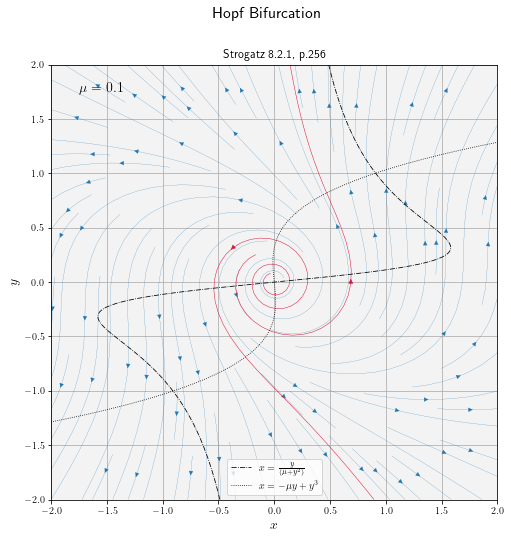

In [7]:
import matplotlib.pyplot as plt
from scipy import *
from scipy import integrate
from scipy.integrate import ode, odeint
import numpy as np

# Initial setup
xx0 = np.array([.25,1.5])
mu =0.1
xmin,xmax = -2,2
ymin,ymax = -2,2
plt.close()
fig,ax0 = plt.subplots(1,1,figsize=(8,8))
ax0.set_facecolor(plt.cm.gray(.95))
#ax.axis('equal')

#Vector field
x1,y1 = np.linspace(xmin,xmax,200),np.linspace(ymin,ymax,200)
X,Y = np.meshgrid(x1,y1 )
U = mu*X - Y +X*Y**2
V = X + mu*Y + Y**3
start = [[0.3,0],[.6,.5]]

#Plotting
strm = ax0.streamplot( X,Y,U, V,linewidth=.2)
try:
    strmS = ax0.streamplot(x1,y1, U, V, start_points=start, color="crimson", linewidth=.5)
except: # IndexError:
    print('Unable to plot initial value trajectories')
fig.suptitle('Hopf Bifurcation', size=16)
ax0.set_title( 'Strogatz 8.2.1, p.256', size=12)
ax0.text(xmin+.25,ymax-.25, r'$\mu = {0}$'.format(mu),size=14)
ax0.plot(y1/(mu+y1**2),x1, 'k-.',lw=.8, label=r'$x = \frac{y}{(\mu+y^2)}$')
ax0.plot(-mu*y1+y1**3,x1, 'k:', lw=.8, label=r'$x =  -\mu y + y^3$')
ax0.set_xlim([xmin,xmax])
ax0.set_ylim([ymin,ymax])
ax0.set_xlabel(r"$ x$",size=14)
ax0.set_ylabel(r"$ y$",size=14)
plt.legend()
plt.grid(True)
plt.legend()
plt.grid(True)
plt.show()

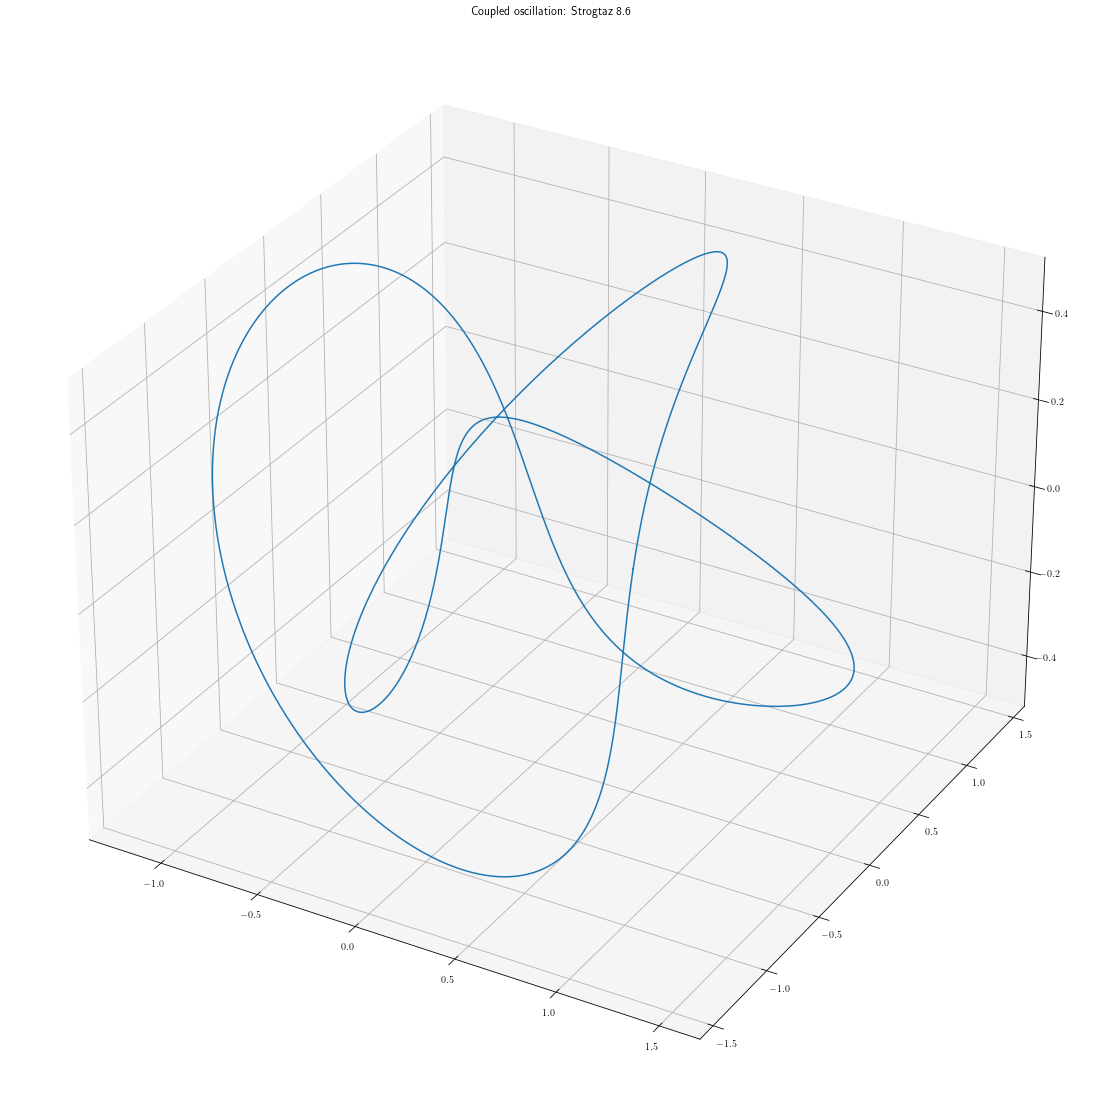

In [8]:
p,q = 3,2
#Plots a meshplane
r = .5
R = 1
v = np.linspace(-p*np.pi,p*np.pi,p*200)
u = np.linspace(-q*np.pi,q*np.pi,p*200)

#Create coordinates
x = (R + r*np.cos(v))*np.cos(u)
y = (R + r*np.cos(v))*np.sin(u)
z= -r*np.sin(v)
fig = plt.figure(figsize=(34,20))
ax = plt.axes(projection='3d')
ax.plot(x,y,z)
ax=plt.title(r'Coupled oscillation: Strogtaz 8.6')

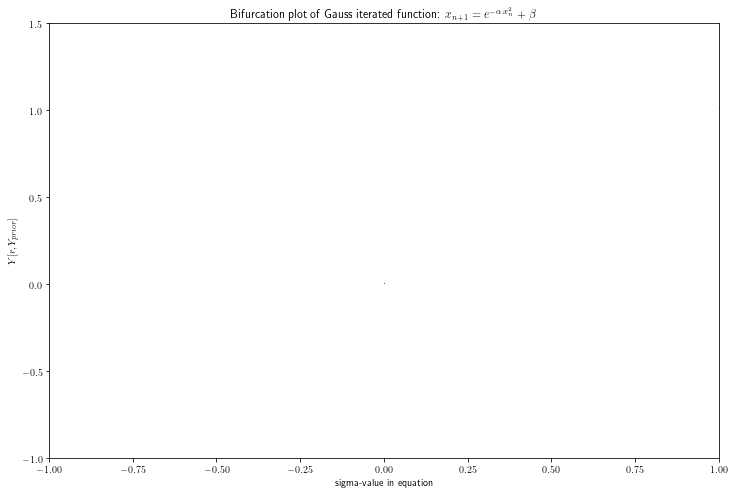

In [3]:
import time as tm

def normal(alpha,beta,x):
    return np.exp(-alpha*x*x) + beta

def xnext(r,xo,N):
    no = 0
    X = np.zeros(r.size*N)
    A = np.zeros(r.size*N)
      #Iterate for each value of r in the array of total_of_r (7000) values.
    for beta in r:
        xinit = xo
      #For each specific r value, iterate 200 x to get a starting value of X and A.
    for i in range(200):
        xinit = normal(alpha,beta,xinit)
    X[no] = xinit
    A[no] = beta
    no += 1
      #Now, for that r-value, iterate it N-times through the function.
      #This gives N-values for each r-value.
    for j in range(1,N):
        X[no] = normal(alpha,beta,X[no-1])
        A[no]= beta
        no += 1
    return A, X

alpha = 4.9
xo = 1.4
Num = 400
beta_min = -1
beta_max = 1
total_of_r = 100000
r = np.linspace(beta_min,beta_max,total_of_r)

A, X = xnext(r,xo,Num)

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(A,X,",",markersize=0.1,color="green")
ax.set_xlim(beta_min,beta_max)
ax.set_ylim(-1,1.5)
ax.set_title(r'Bifurcation plot of Gauss iterated function: $x_{n + 1}=e^{-\alpha.x_n^2}+\beta$')
ax.set_xlabel('sigma-value in equation')
ax.set_ylabel(r'$Y[r,Y_{prior}]$')
plt.show()